# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua M. \
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

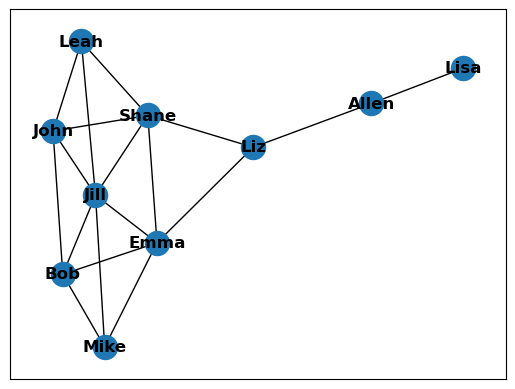

In [54]:
## Generate the Graph
#References:
# How to use networkx: https://networkx.org/documentation/stable/tutorial.html
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Create empty graph
G = nx.Graph()

# Create the array for the nodes
Name_array=['Bob', 'Mike', 'Jill', 'Emma', 'John', 'Leah', 'Shane', 'Liz', 'Allen', 'Lisa']

# Add nodes from the name array
G.add_nodes_from(Name_array)

# Create edges
G.add_edges_from([("Bob", "Mike"),("Bob","Emma"), ("Bob", "Jill"), ("Bob","John")])
G.add_edges_from([("Mike","Jill"),("Mike","Emma")])
G.add_edges_from([("Emma","Jill"),("Shane","Emma"),("Emma","Liz")])
G.add_edges_from([("Shane","Jill"),("Shane", 'John'),("Shane","Leah"),("Shane", "Liz")])
G.add_edges_from([("Leah","Jill"),("Leah", "John")])
G.add_edges_from([("John","Jill"),("John","Bob")])
G.add_edges_from([("Liz", "Allen"),("Allen", "Lisa")])
# Show resulting graph
subax1 = plt.subplot(111)
nx.draw_networkx(G, with_labels=True, font_weight='bold')

Graph Diameter: 4
Potential edges: 45
Total number of edges: 18
Network Density: 40.0 %
Average degree: 3.6


C:\Users\User\AppData\Local\Temp\ipykernel_23472\3699166561.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_axis)
C:\Users\User\AppData\Local\Temp\ipykernel_23472\3699166561.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(rawrwarwar)


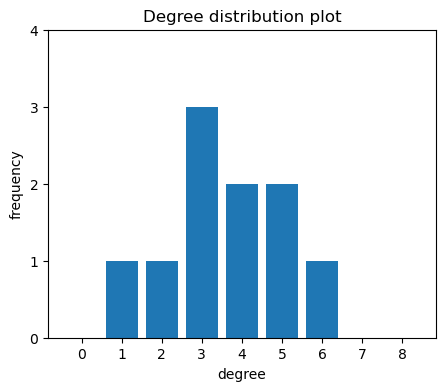

In [9]:
#References: 
# How to get network diameter: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html
# What is network density: https://www.the-vital-edge.com/knowledge-base/what-is-network-density/
# How to get degree: https://mathinsight.org/degree_distribution
# How to get degree using networkx: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.DiGraph.degree.html

## Getting the network diameter
DM=nx.diameter(G, e=None, usebounds=False, weight=None)
print("Graph Diameter:", DM)

## Getting the network density
N=G.number_of_nodes()
E=G.number_of_edges()
potential_edges = N*(N-1)/2
network_density=E/potential_edges
print("Potential edges:", int(potential_edges))
print("Total number of edges:", int(E))
print("Network Density:", network_density*100,"%")

## Getting the average degree
deg=0
for i in Name_array:
    deg=deg+G.degree(i)
avgdeg=deg/N
print("Average degree:", avgdeg)

## Degree distribution plot
x_axis=np.arange(0,N-1) # All possible degrees
y_axis=np.zeros(N-1) # Frequency counter

for i in Name_array:
    y_axis[int(G.degree(i))]=y_axis[int(G.degree(i))]+1 # Adds on frequency counter

## Show degree distribution plot
fig1,ax1 = plt.subplots(nrows=1, ncols=1,figsize=[5,4])
rawrwarwar=np.arange(0,5)
img1=ax1.bar(x_axis, y_axis)
ax1.set_title('Degree distribution plot')
ax1.set_xticklabels(x_axis)
ax1.set_yticklabels(rawrwarwar)
ax1.set_xlabel('degree')
ax1.set_ylabel('frequency')
ax1.set_xticks(x_axis)
ax1.set_yticks(rawrwarwar)

For this activity, the first part required us to create a network representing the connections between 10 people.  I was able to do it by creating a list of the people and creating a node for each person using a for loop. All edges were created one-by-one, which made me feel like there should be an easier way to do it that I don’t know. The process undertaken resulted to a network identical to the one shown. The network diameter was automatically computed using the function nx.diameter() which resulted to D=4. By manually counting the number of geodesics with the length 4 we know that there are five examples: Lisa-Mike, Lisa-Bob, Lisa-Jill, lisa-John, and Lisa-leah. Next, we got the network density which is given by the total number of edges divided by total number of possible edges which resulted to 40% network density. Next, we got the average degree. The degree for each node is given by the number of edges connected to it. Jill has the highest degree which is 6 while Lisa has the lowest with 1. The average degree was computed to be 3.6. To illustrate the distribution, a degree distribution plot was created which showed that the degree with the highest number of nodes was 3. As shown in the degree distribution plot, most nodes are connected to three or more other nodes.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [10]:
# References:
# Betweeness Centrality: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
# Closeness centrality: https://networkx.org/documentation/networkx-1.2/reference/generated/networkx.closeness_centrality.html
import pandas as pd

## Create empty arrays to store values of centrality measures for each node
edgenumber=[]
degcentrality=[]
BetweenCentrality=[]
closenessCentrality=[]

## Add the centrality measure values for each node
for i in Name_array:
    edgenumber.append(G.degree(i))
    degcentrality.append(G.degree(i)/(len(Name_array)-1))
    BetweenCentrality.append(nx.betweenness_centrality(G)[i])
    closenessCentrality.append(nx.closeness_centrality(G)[i])

## Turn the stored values to a dataframe
list_of_tuples = list(zip(Name_array, edgenumber, degcentrality,BetweenCentrality, closenessCentrality))
columnnames=['Name','Edges', 'Degree Centrality','Betweenness Centrality','Closeness Centrality']
df = pd.DataFrame(list_of_tuples, columns=columnnames)

## Show dataframe
display(df)

,Name,Edges,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Bob,4,0.444444,0.023148,0.529412
1,Mike,3,0.333333,0.000000,0.500000
2,Jill,6,0.666667,0.101852,0.600000
3,Emma,5,0.555556,0.231481,0.642857
4,John,4,0.444444,0.023148,0.529412
5,Leah,3,0.333333,0.000000,0.500000
6,Shane,5,0.555556,0.231481,0.642857
7,Liz,3,0.333333,0.388889,0.600000
8,Allen,2,0.222222,0.222222,0.428571
9,Lisa,1,0.111111,0.000000,0.310345


For part 2, we were asked to get the centrality measurements of each node. Three centrality measurements were computed which are: Degree centrality, Betweenness centrality, and Closeness centrality. The degree centrality counts the degree of each node then divides it by the maximum possible degree of each node which is given by N-1 where N is the total number of nodes. Since Jill had the highest degree, Jill had the highest degree centrality which just means Jill is the most connected node. Meanwhile, the betweenness centrality of each specific node is measured by counting the number of geodesics between two other nodes that has that specific node in its way. To normalize the betweenness centrality, it is divided by the (N-1)(N-2)/2 where N is the total number of nodes. For our network, Liz had the highest betweenness centrality at 0.388889 which makes sense because every geodesic that has Allen or Lisa as an endpoint (aside from Allen to Lisa and vice versa) has Liz on its path. Meanwhile, Lisa has the lowest betweenness centrality because it’s connected only to one edge, telling us that Lisa cannot be in a geodesic between two points.  Lastly, the closeness centrality measures how close each node to all the other nodes. The closeness centrality of each node is calculated by getting the reciprocal after summing the geodesic distance of the given node to all of the other nodes. The closeness centrality is normalized by multiplying it with N-1, where N is the number of nodes in the network. For this network, Shane and Emma has the highest closeness centrality indicating that their average distance with all of other nodes is the lowest. Lisa has the lowest closeness centrality which makes sense because, aside from Allen and Liz, has a geodesic distance of at least 3.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

0.0


C:\Users\User\AppData\Local\Temp\ipykernel_23472\3348872097.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', max(partition.values()) + 1)


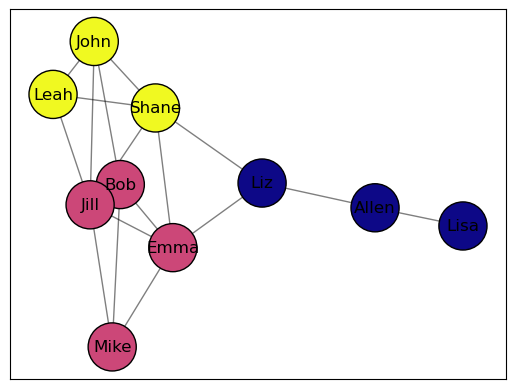

Modulariy: 0.22222222222222218


In [56]:
#References:
#add labels to draw_networkx_nodes: https://stackoverflow.com/questions/29687380/drawing-labels-in-networkx-graph
#Lovain Communities implementation: https://python-louvain.readthedocs.io/en/latest/api.html

nx.community.louvain_communities(G)
import matplotlib.cm as cm
import community as community_louvain
import networkx as nx

partition = community_louvain.best_partition(G, random_state=233)
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),node_size=1200,edgecolors='black', cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos, font_size=12,font_family='sans-serif', font_color='black')
print(nx.community.modularity(G,[partition]))
plt.show()
# Create a list of communities for modularity computation
a=set({})
b=set({})
c=set({})
for i in Name_array:
    if partition[i]==0:
        a.add(i)
    elif partition[i]==1:
        b.add(i)
    else:
        c.add(i)
comm=[a,b,c]
print('Modulariy:',nx.community.modularity(G, comm))

C:\Users\User\AppData\Local\Temp\ipykernel_23472\1627774144.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', max(partition.values()) + 1)


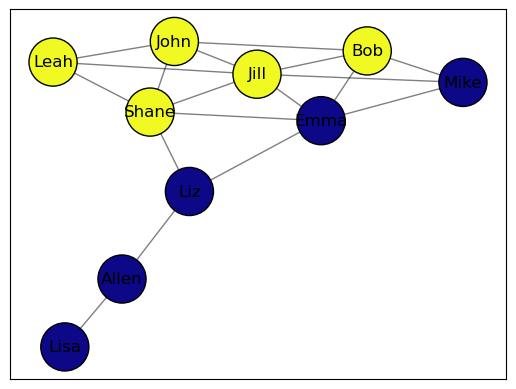

[{'Allen', 'Lisa', 'Mike', 'Emma', 'Liz'}, {'Shane', 'Leah', 'Bob', 'Jill', 'John'}, set()]
Modulariy: 0.14197530864197527


In [55]:
## References:
## Kernighan lin bisection implementation: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html

## Implement kernighan lin bisection using the function from nx
rawr = nx.community.kernighan_lin_bisection(G,seed=233)
# create empty dictionary where we can store the group number for each node
partition={}
# Add values na 0 at 1 sa names sa dictionary depende sa result ng kernighan lin bisection
for i in np.arange(len(rawr)):
    for ii in rawr[i]:
        partition[ii]=i

pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),node_size=1200, cmap=cmap, node_color=list(partition.values()),edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos, font_size=12,font_family='sans-serif', font_color='black')
plt.show()
# Create a list of communities for modularity computation
a=set({})
b=set({})
c=set({})
for i in Name_array:
    if partition[i]==0:
        a.add(i)
    elif partition[i]==1:
        b.add(i)
    else:
        c.add(i)
comm=[a,b,c]
print(comm)
print('Modulariy:',nx.community.modularity(G, comm))

For the third section, two community detection methods were used: Lovain community detection and Kernighan Lin Bisection. Lovain community detection divided the graph into three communities by optimizing modularity given by $$Q=\frac{1}{2m}\sum_i \sum_j \left[A_{ij}-\frac{k_i k_j}{2m}\right]\sigma(c_i,c_j)$$ Kernighan Lin Bisection does the same with the added constraint of dividing the nodes into two equal numbers. For this graph, lovain community detection and Kernighan Lin Bisection resulted to modularities 0.2222 and 0.1420 respectively indicating that both methods created low quality partitions for this particular network